Кошки и собаки

In [342]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,Conv2D, MaxPooling2D

from tensorflow.keras.datasets import cifar10  # библиотека базы выборок cifar10  

In [332]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

for i in range(len(y_train)):
    if y_train[i][0] != 5 and y_train[i][0] != 3:
        y_train[i] = 0 # ничего
    if y_train[i][0] == 5:  
        y_train[i] = 1 # собаки
    if y_train[i][0] == 3:  
        y_train[i] = 2 # кошки
    
for i in range(len(y_test)):
    if y_test[i][0] != 5 and y_test[i][0] != 3:
        y_test[i] = 0
    if y_test[i][0] == 5: 
        y_test[i] = 1
    if y_test[i][0] == 3:  
        y_test[i] = 2

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 3)
y_test_cat = keras.utils.to_categorical(y_test, 3)


Таким образом получаем 3 выхода: 2 - кошка, 1 - собака, 0 - не кошка и не собака

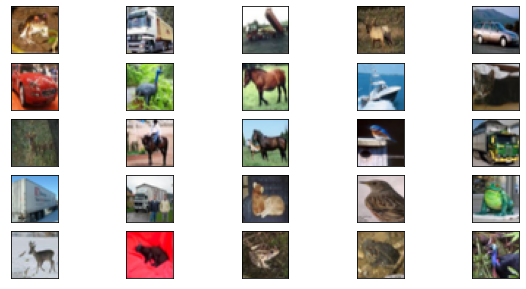

In [333]:
#print(ds_info)

plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()
#fig = tfds.show_examples(ds_train, ds_info, rows = 4, cols = 4)

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories

In [336]:
model = keras.Sequential([
    Flatten(input_shape=(32, 32, 3)), # входной слой
    Dense(128, activation='relu'), # скрытый слой
    Dropout(0.5),
    #BatchNormalization(),
    Dense(3, activation='softmax') # выходной слой
])

#print(model.summary())      # вывод структуры НС в консоль

Epoch 1/5
80/80 [==============================] - 1s 14ms/step - loss: 0.7941 - accuracy: 0.7774 - val_loss: 0.6044 - val_accuracy: 0.7959
Epoch 2/5
80/80 [==============================] - 1s 11ms/step - loss: 0.6052 - accuracy: 0.8012 - val_loss: 0.5894 - val_accuracy: 0.7959
Epoch 3/5
80/80 [==============================] - 1s 15ms/step - loss: 0.5875 - accuracy: 0.8030 - val_loss: 0.5757 - val_accuracy: 0.7969
Epoch 4/5
80/80 [==============================] - 1s 15ms/step - loss: 0.5751 - accuracy: 0.8041 - val_loss: 0.5639 - val_accuracy: 0.7996
Epoch 5/5
80/80 [==============================] - 1s 15ms/step - loss: 0.5684 - accuracy: 0.8044 - val_loss: 0.5552 - val_accuracy: 0.8010


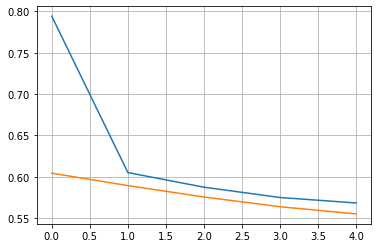

In [337]:
mySGD = keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=True)

model.compile(optimizer=mySGD,
             loss='categorical_crossentropy', # т.к больше чем 2 класса
             metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, batch_size=500, epochs=5, validation_split=0.2)

plt.plot(history.history['loss']) # 2й history - словарь, loss - критерий качества
#, вычисленный для каждой эпохи
plt.plot(history.history['val_loss'])

plt.grid(True)
plt.show()

In [338]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.5493 - accuracy: 0.8054


[0.5493035316467285, 0.805400013923645]

In [339]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test) # 10000 векторов из 10 значений
pred = np.argmax(pred, axis=1) # 10000 значений, которые являются числом

new_y = []
for i in range(len(y_test)):
    new_y.append(int(y_test[i][0]))
    
#print(new_y)  

print(pred.shape)

print(pred[:20]) # первые 20 предсказанных чисел
print(new_y[:20]) # реальные первые 20 чисел

(10000,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]


In [340]:
# Выделение неверных вариантов
mask = pred == new_y # формируем маску. Где сравненные значения равны -> True
# если не равны -> False
print(mask[:10]) #

x_false = x_test[~mask] # только те, что со значением false
p_false = pred[~mask]

print(x_false.shape)

[False  True  True  True  True  True  True  True False  True]
(1946, 32, 32, 3)


Заключение сети: Ничего
Заключение сети: Ничего
Заключение сети: Ничего
Заключение сети: Ничего
Заключение сети: Ничего
Заключение сети: Ничего
Заключение сети: Ничего
Заключение сети: Ничего
Заключение сети: Ничего
Заключение сети: Ничего


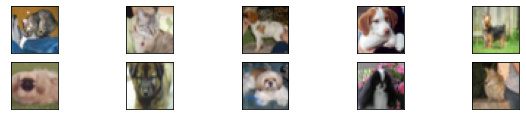

In [341]:
# Вывод первых 10 неверных результатов
class_name = ["Ничего","Собака","Кошка"]
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    print("Заключение сети: " + class_name[p_false[i]])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()